# 1- Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import string
import re
import os
import nltk
from nltk.corpus import stopwords, twitter_samples
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt 

# 2- Loading and Preprocessing data

In [ ]:
imdb_data_path = "../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv"

In [ ]:
imdb_data = pd.read_csv(imdb_data_path)

In [ ]:
# Converting the positive labels to 1 and the negative labels to 0

imdb_data['sentiment'].mask(imdb_data['sentiment'] == 'positive', 1, inplace=True)
#This line of code replaces all occurrences of 'positive' in the 'sentiment' column with the value 1
imdb_data['sentiment'].mask(imdb_data['sentiment'] == 'negative', 0, inplace=True)
#This line of code replaces all occurrences of 'negative' in the 'sentiment' column with the value 0.

In [ ]:
# Get the reviews and the labels

all_reviews = list(imdb_data['review'])
labels = np.asarray(imdb_data['sentiment'])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# cutoff reviews after 200 words
maxlen = 200
training_samples = 40000
validation_samples = 5000
testing_samples = 5000

# consider the top 100000 words in the dataset
max_words = 100000

# tokenize each review in the dataset
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_reviews)
sequences = tokenizer.texts_to_sequences(all_reviews)

"""
In the given code snippet, the lines you mentioned are responsible for tokenizing the reviews in the dataset 
using the Tokenizer class from tensorflow.keras.preprocessing.text.
Let's break down those lines and explain their purpose:

tokenizer = Tokenizer(num_words=max_words): This line initializes a Tokenizer object with the specified num_words parameter.
 The num_words parameter indicates the maximum number of words to keep in the vocabulary, based on word frequency.
  In this case, it is set to max_words, which is defined as 100,000. 
  This means that only the top 100,000 most frequent words will be considered during tokenization.

tokenizer.fit_on_texts(all_reviews): This line fits the tokenizer on the provided all_reviews data. 
It updates the internal vocabulary of the tokenizer based on the text data in all_reviews.
 This step allows the tokenizer to learn the vocabulary and assign a unique index to each word in the dataset.

sequences = tokenizer.texts_to_sequences(all_reviews):
 This line converts the text reviews in all_reviews into sequences of integers using the learned vocabulary from the tokenizer.
  Each word in the reviews is replaced with its corresponding integer index.
   The resulting sequences represent the tokenized versions of the reviews.
   
In summary, these lines initialize a tokenizer, fit it on the text data to learn the vocabulary, 
and then convert the text reviews into sequences of integers using the learned vocabulary. 
The sequences can be further processed or used as input for machine learning models.
Regenerate response"""


In [ ]:
word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))
ind2word = dict([(value, key) for (key, value) in word_index.items()])



"""
ind2word : The line of code you provided creates a dictionary ind2word that maps integer indices to their corresponding words. 
It uses a dictionary comprehension to iterate over the word_index dictionary and swap the keys and values.
 The code uses a list comprehension to create a new list of tuples where the key-value pairs of the word_index dictionary are reversed.
  It iterates over the items of word_index using the .items() method, which returns a sequence of key-value tuples.
   Then, for each tuple (key, value), it creates a new tuple (value, key).

Finally, the dict() function is used to convert the list of tuples into a dictionary, resulting in the ind2word dictionary.
 This dictionary allows you to look up words using their integer indices. 
 For example, ind2word[1] will return the word corresponding to index 1 in the vocabulary.
"""

# The word_index dictionary itself does not directly store the frequency of occurrence of words. 
# It is a mapping of words to their integer indices based on their order of occurrence in the training data.
# To determine the frequency of occurrence of words, you can use the tokenizer.word_counts attribute.
# It is a dictionary that contains the count of each word in the training data. 
# The keys of the dictionary are the words, and the values are their respective frequencies.



Found 124252 unique tokens.


In [ ]:
# pad the sequences so that all sequences are of the same size
data = pad_sequences(sequences, maxlen=maxlen)

"""
The line data = pad_sequences(sequences, maxlen=maxlen) is used to perform padding on the sequences of tokenized reviews.
 Padding is a process of adding zeros (or any other specified value) to sequences that are shorter than a certain length,
  in order to make all sequences of the same length.
"""


In [ ]:
# shuffling the data and labels

indices = np.arange(data.shape[0])
np.random.shuffle(indices)


"""
The code snippet indices = np.arange(data.shape[0]) creates an array of indices from 0 to the number of rows in the data array.
The line np.random.shuffle(indices) shuffles the indices randomly. 
This random shuffling is typically done to randomize the order of the data, 
which is useful for tasks like training a machine learning model.
 Shuffling the indices ensures that the data samples are presented in a random order during training, 
 which helps prevent any bias that may arise from the original order of the data.
"""


data = data[indices]
labels = labels[indices]


"""
The code snippet data = data[indices] and labels = labels[indices] is used to shuffle the data and labels in the same random order.
 It ensures that the data samples and their corresponding labels are shuffled in a consistent way,
  so that the order of the data andlabels match.

Here, indices is an array of indices ranging from 0 to the number of data samples. 
By shuffling the indices, we randomize the order of the data samples.

The line data = data[indices] rearranges the rows of the data array according to the shuffled indices. 
Similarly, labels = labels[indices] rearranges the elements of the labels array.

By performing these operations, the data samples and their labels are now shuffled in the same order, 
allowing us to maintain the correspondence between the data and its labels.

"""


# Splitting the data set to training and validation datasets 

x_train = data[: training_samples]
y_train = labels[: training_samples]

"""
This assigns the first "training_samples" i.e.40000 number of data samples and labels to x_train and y_train, respectively. 
These will be used for training the model.
"""

x_val = data[training_samples : training_samples + validation_samples]
y_val = labels[training_samples : training_samples + validation_samples]

"""
This assigns the next validation_samples number of data samples and labels to x_val and y_val, respectively.4
4000:4000+5000  i.e 4 to 9 k are validation sample
 These will be used for validating the model during training
"""

x_test = data[training_samples + validation_samples: training_samples + validation_samples + testing_samples]
y_test = labels[training_samples + validation_samples: training_samples + validation_samples + testing_samples]

"""
9 to 14k are testing samples
"""

x_train = np.asarray(x_train).astype(np.int)
y_train = np.asarray(y_train).astype(np.int)
x_val = np.asarray(x_val).astype(np.int)
y_val = np.asarray(y_val).astype(np.int)
x_test = np.asarray(x_test).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)

In [ ]:
x_train.shape

(40000, 200)

In [ ]:
x_val.shape

(5000, 200)

In [ ]:
x_test.shape

(5000, 200)

# 3- Deep Learning Models

## 3.1- Simple Model 

In [ ]:
embedding_dim = 300
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

"""
This code defines a sequential model with the following layers:

Embedding layer: Maps each word index to a dense vector representation. 
It takes the max_words as the input dimension, embedding_dim as the output dimension, and maxlen as the input length.

GlobalAveragePooling1D layer: Computes the average of the sequence across the embeddings dimension, resulting in a fixed-length output vector.

Dense layers: Three fully connected layers with 256, 128, and 64 units respectively, using ReLU activation function.

Dense layer: Final output layer with 1 unit and sigmoid activation function for binary classification.
"""

simple_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# This line compiles the model with binary cross-entropy loss, Adam optimizer, and accuracy as the evaluation metric.


simple_model_history = simple_model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=5)
# This trains the model on the training data x_train and y_train, with validation data provided by x_val and y_val.
# The model is trained for 5 epochs, and the training history is stored in simple_model_history.

Epoch 1/5
1250/1250 [==============================] - 14s 10ms/step - loss: 0.3234 - accuracy: 0.8572 - val_loss: 0.2661 - val_accuracy: 0.8856
Epoch 2/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1568 - accuracy: 0.9402 - val_loss: 0.3017 - val_accuracy: 0.8846
Epoch 3/5
1250/1250 [==============================] - 13s 10ms/step - loss: 0.0879 - accuracy: 0.9645 - val_loss: 0.3898 - val_accuracy: 0.8750
Epoch 4/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0548 - accuracy: 0.9779 - val_loss: 0.5235 - val_accuracy: 0.8682
Epoch 5/5
1250/1250 [==============================] - 12s 10ms/step - loss: 0.0349 - accuracy: 0.9869 - val_loss: 0.6521 - val_accuracy: 0.8740


# 4- Models Performance visualization

In [ ]:
# The code snippet defines a function plot_acc_and_loss that takes a model history object as input 
# and plots the training and validation accuracy as well as the training and validation loss over epochs. 

def plot_acc_and_loss(model_histpry):

    acc = model_histpry.history['accuracy']
    val_acc = model_histpry.history['val_accuracy']

    loss = model_histpry.history['loss']
    val_loss = model_histpry.history['val_loss']
    # These lines extract the accuracy and loss values for training and validation data from the model_history object.

    epochs = range(1, len(acc) + 1)
    # This line creates a range of epochs starting from 1 to the length of the accuracy values.

    fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(6, 4), dpi=80)
    # This line creates a figure and two subplots for plotting accuracy and loss.

    ax[0].plot(epochs, acc, label = "Training Accuracy", color='darkblue')
    ax[0].plot(epochs, val_acc, label = "Validation Accuracy", color='darkgreen')
    ax[0].grid(alpha=0.3)
    ax[0].title.set_text('Training Vs Validation Accuracy')
    ax[0].fill_between(epochs, acc, val_acc, color='crimson', alpha=0.3)
    plt.setp(ax[0], xlabel='Epochs')
    plt.setp(ax[0], ylabel='Accuracy')
    # These lines plot the training and validation accuracy values on the first subplot. 
    #The grid is added, and the subplot is labeled. 
    # A filled area is created between the training and validation accuracy curves. 
    # The x-label is set as 'Epochs', and the y-label is set as 'Accuracy'.


    ax[1].plot(epochs, loss, label = "Training Loss", color='darkblue')
    ax[1].plot(epochs, val_loss, label = "Validation Loss", color='darkgreen')
    ax[1].grid(alpha=0.3)
    ax[1].title.set_text('Training Vs Validation Loss')
    ax[1].fill_between(epochs,loss, val_loss, color='crimson', alpha=0.3)
    plt.setp(ax[1], xlabel='Epochs')
    plt.setp(ax[1], ylabel='Loss')
    # These lines plot the training and validation loss values on the second subplot.
    # Similar to the previous subplot, the grid is added, and the subplot is labeled.
    # A filled area is created between the training and validation loss curves.
    # The x-label is set as 'Epochs', and the y-label is set as 'Loss'.



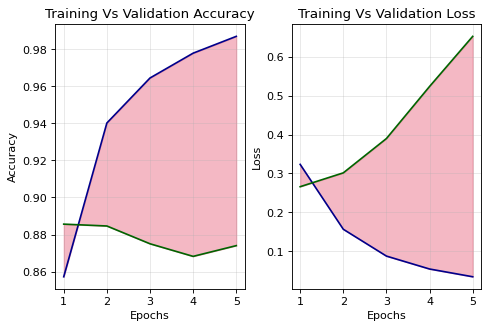

In [ ]:
plot_acc_and_loss(simple_model_history)

# 5- Testing and Prediction

In [ ]:
# The code defines a function eval_model that takes a model as input and evaluates its performance on the training, validation, and test datasets.
def eval_model(model):
    
    model_acc_train_dataset = model.evaluate(x_train, y_train)
    model_acc_val_dataset = model.evaluate(x_val, y_val)
    model_acc_test_dataset = model.evaluate(x_test, y_test)
    # These lines evaluate the model's performance on the training, validation, and test datasets using the evaluate method.
    # The x_train, y_train, x_val, y_val, x_test, and y_test are the input and label data for each dataset.
    
    return model_acc_train_dataset, model_acc_val_dataset, model_acc_test_dataset

simple_model_acc_train_dataset, simple_model_acc_val_dataset, simple_model_acc_test_dataset = eval_model(simple_model)
#simple_rnn_model_acc_train_dataset, simple_rnn_model_acc_val_dataset, simple_rnn_model_acc_test_dataset = eval_model(simple_rnn_model)


"""
The eval_model function is designed to evaluate the performance of a given model by directly calling the evaluate method on the model using the appropriate input and label data. It expects a model object as input.

On the other hand, simple_model_history is the history object returned by the fit method when training the model. It contains information about the training process, such as the training and validation loss and accuracy at each epoch. It is not meant to be passed to the eval_model function for evaluation.

Therefore, to evaluate the performance of the simple_model, you should use eval_model(simple_model) to obtain the evaluation results on the training, validation, and test datasets.
"""



train_accs = [simple_model_acc_train_dataset[1]]

val_accs = [simple_model_acc_val_dataset[1]]

test_accs = [simple_model_acc_test_dataset[1]]

models_eval_df = pd.DataFrame({"Training Accuracy":train_accs, "Validation Accuracy":val_accs, "Testing Accuracy":test_accs},
                              index=['simple_model'])

157/157 [==============================] - 0s 2ms/step - loss: 0.6533 - accuracy: 0.8676


In [ ]:
models_eval_df

,Training Accuracy,Validation Accuracy,Testing Accuracy
simple_model,0.993225,0.874,0.8676


In [ ]:
class_names = ["Positive","Negative"]

In [ ]:
y_predict=simple_model.predict(y_test)

In [ ]:
y_predict=y_predict.astype(int)

In [ ]:
 from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, y_predict, target_names=class_names))

print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

    Positive       0.50      1.00      0.67      2523
    Negative       0.00      0.00      0.00      2477

    accuracy                           0.50      5000
   macro avg       0.25      0.50      0.34      5000
weighted avg       0.25      0.50      0.34      5000

[[2523    0]
 [2477    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
